In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Exploratory Data Analysis

In [2]:
#read data
data =pd.read_csv('D:\\Array Diploma\\Data\\mushrooms.csv')

In [3]:
#data shape
data.shape

(8124, 23)

In [4]:
#data types
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#checking for null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
print('The Number Of Unique Values In Class Column is ==> ',data['class'].nunique())
print('The Number Of Unique Values In cap-shape Column is ==> ',data['cap-shape'].nunique())
print('The Number Of Unique Values In cap-surface Column is ==> ',data['cap-surface'].nunique())
print('The Number Of Unique Values In cap-color Column is ==> ',data['cap-color'].nunique())
print('The Number Of Unique Values In bruises Column is ==> ',data['bruises'].nunique())
print('The Number Of Unique Values In odor Column is ==> ',data['odor'].nunique())
print('The Number Of Unique Values In gill-attachment Column is ==> ',data['gill-attachment'].nunique())
print('The Number Of Unique Values In gill-spacing Column is ==> ',data['gill-spacing'].nunique())
print('The Number Of Unique Values In gill-size Column is ==> ',data['gill-size'].nunique())
print('The Number Of Unique Values In gill-color Column is ==> ',data['gill-color'].nunique())
print('The Number Of Unique Values In stalk-shape Column is ==> ',data['stalk-shape'].nunique())
print('The Number Of Unique Values In stalk-root Column is ==> ',data['stalk-root'].nunique())
print('The Number Of Unique Values In stalk-surface-above-ring Column is ==> ',data['stalk-surface-above-ring'].nunique())
print('The Number Of Unique Values In stalk-surface-below-ring Column is ==> ',data['stalk-surface-below-ring'].nunique())
print('The Number Of Unique Values In stalk-color-above-ring Column is ==> ',data['stalk-color-above-ring'].nunique())
print('The Number Of Unique Values In stalk-color-below-ring Column is ==> ',data['stalk-color-below-ring'].nunique())
print('The Number Of Unique Values In veil-type Column is ==> ',data['veil-type'].nunique())
print('The Number Of Unique Values In veil-color Column is ==> ',data['veil-color'].nunique())
print('The Number Of Unique Values In ring-number Column is ==> ',data['ring-number'].nunique())
print('The Number Of Unique Values In ring-type Column is ==> ',data['ring-type'].nunique())
print('The Number Of Unique Values In spore-print-color Column is ==> ',data['spore-print-color'].nunique())
print('The Number Of Unique Values In population Column is ==> ',data['population'].nunique())
print('The Number Of Unique Values In habitat Column is ==> ',data['habitat'].nunique())

The Number Of Unique Values In Class Column is ==>  2
The Number Of Unique Values In cap-shape Column is ==>  6
The Number Of Unique Values In cap-surface Column is ==>  4
The Number Of Unique Values In cap-color Column is ==>  10
The Number Of Unique Values In bruises Column is ==>  2
The Number Of Unique Values In odor Column is ==>  9
The Number Of Unique Values In gill-attachment Column is ==>  2
The Number Of Unique Values In gill-spacing Column is ==>  2
The Number Of Unique Values In gill-size Column is ==>  2
The Number Of Unique Values In gill-color Column is ==>  12
The Number Of Unique Values In stalk-shape Column is ==>  2
The Number Of Unique Values In stalk-root Column is ==>  5
The Number Of Unique Values In stalk-surface-above-ring Column is ==>  4
The Number Of Unique Values In stalk-surface-below-ring Column is ==>  4
The Number Of Unique Values In stalk-color-above-ring Column is ==>  9
The Number Of Unique Values In stalk-color-below-ring Column is ==>  9
The Number

In [8]:
#checking for duplicated columns
data['cap-shape'].duplicated().any() 

True

There's no null or duplicated values in the dataset.

In [9]:
#data describe
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
#veil type is the same in every column and thus will be removed
#aside from the this, the data is already clean and doesn't require further processing
data.drop('veil-type',axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

This dataset contains 4208 entries of edible mushroom characteristics, and 3916 poisnonous entries and is therefore balanced.

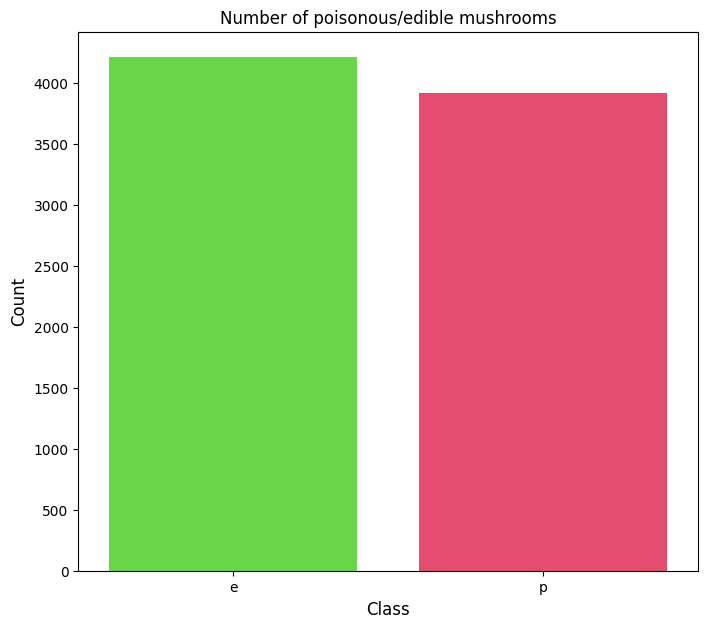

In [15]:
count = data['class'].value_counts()
x = count.index
y = count.values
plt.figure(figsize=(8,7))
sns.barplot(x=x, y=y, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

plt.show()

Now let's take a quick look at distribution of the data. 

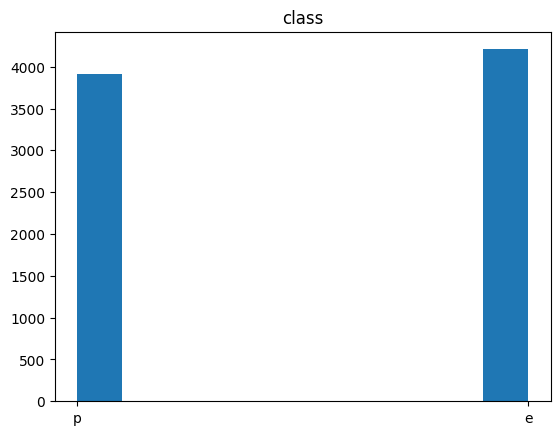

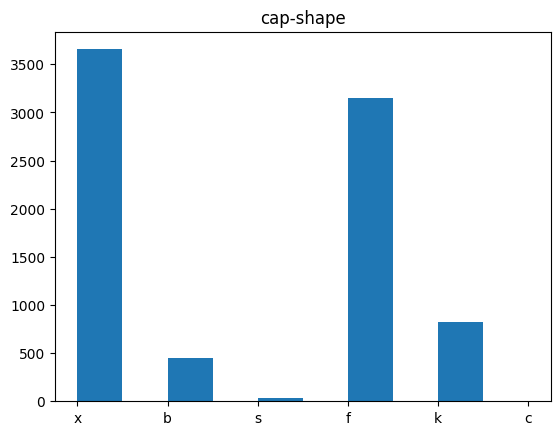

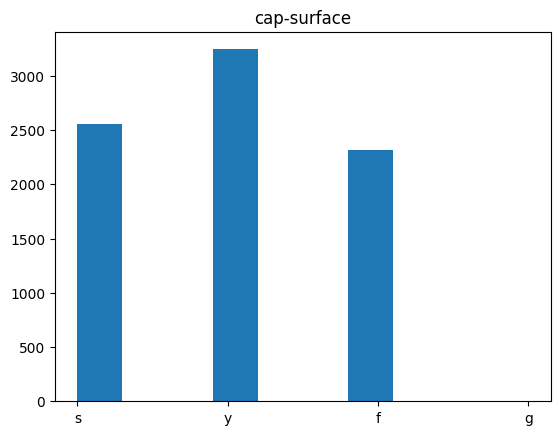

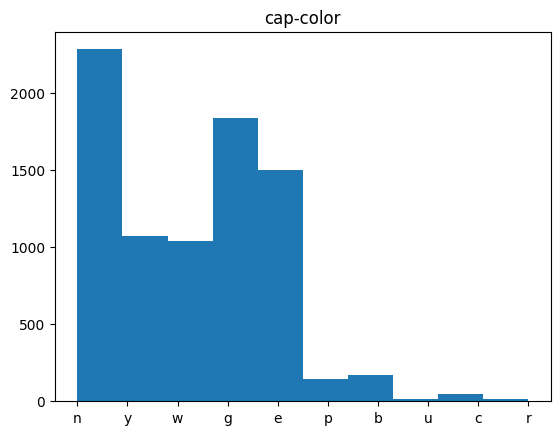

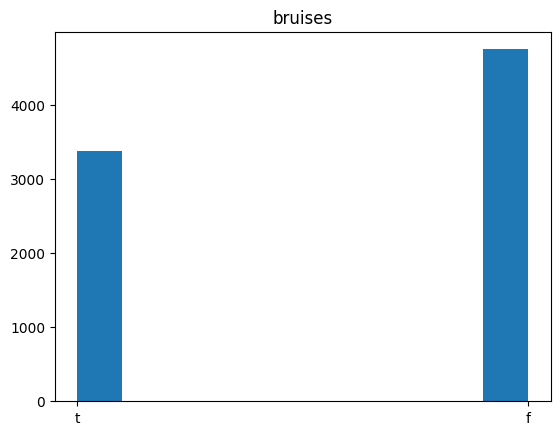

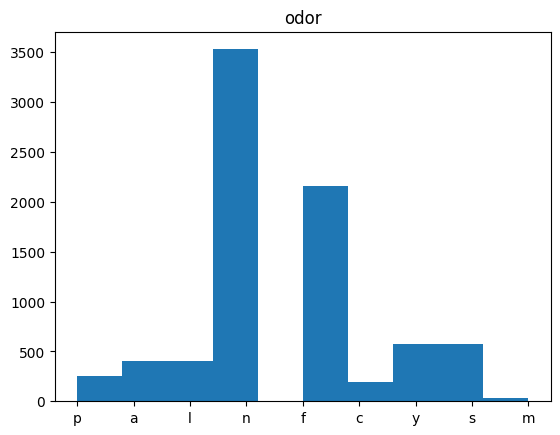

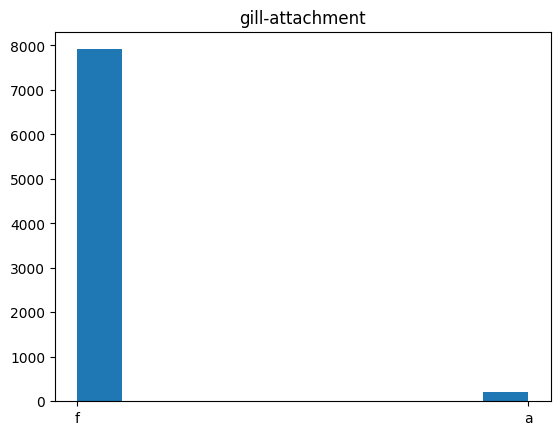

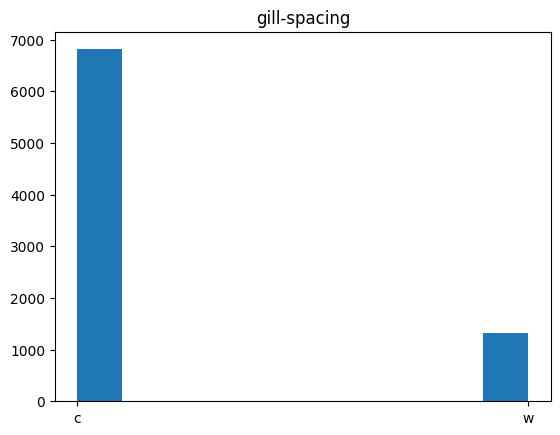

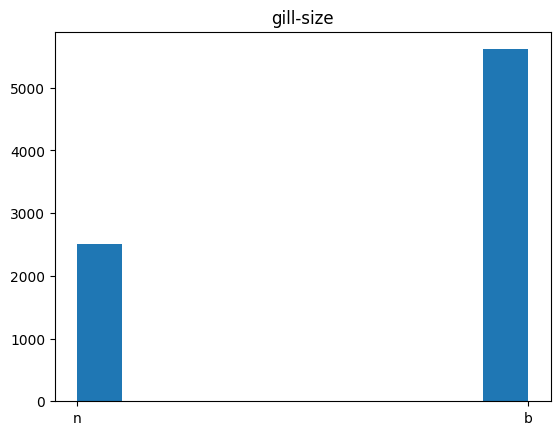

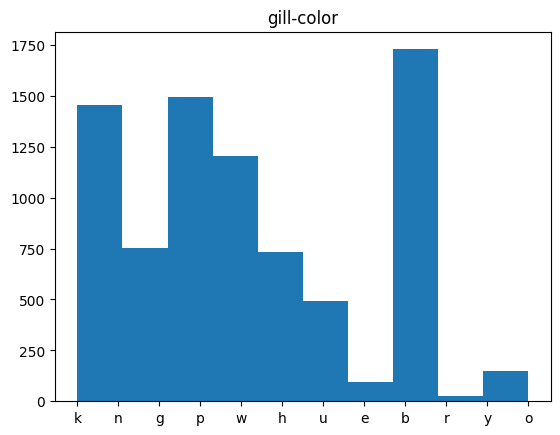

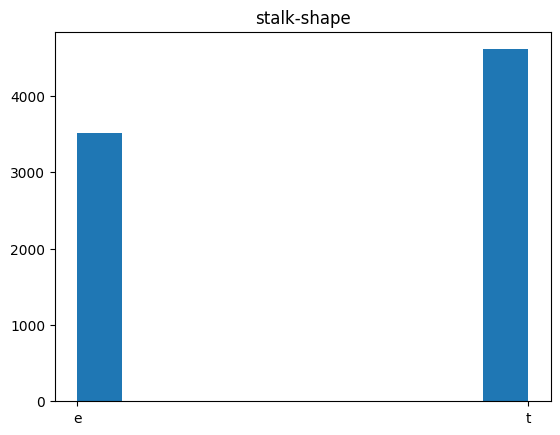

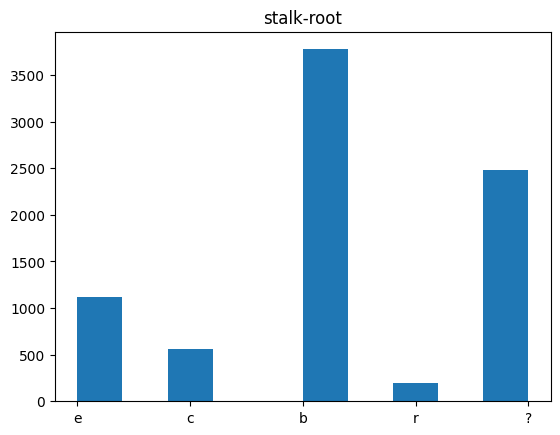

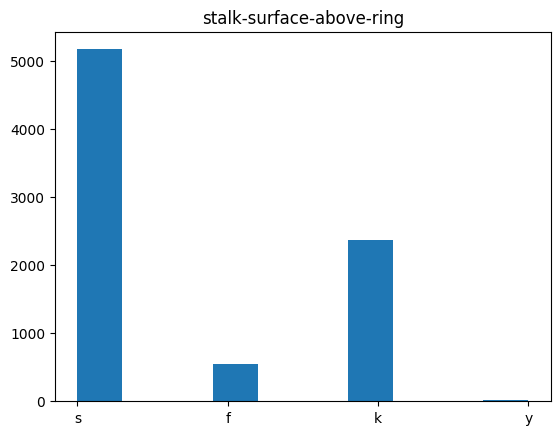

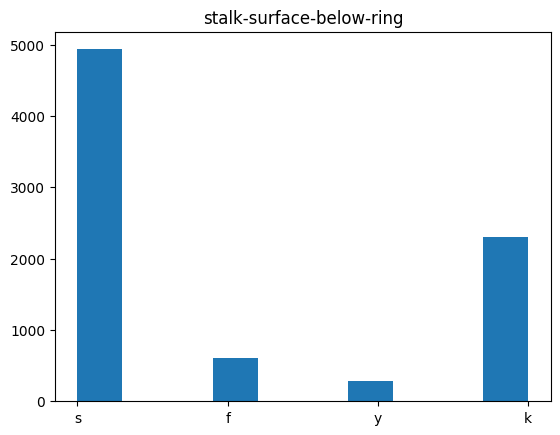

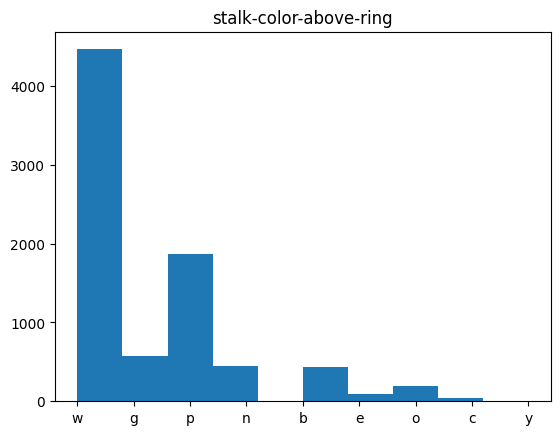

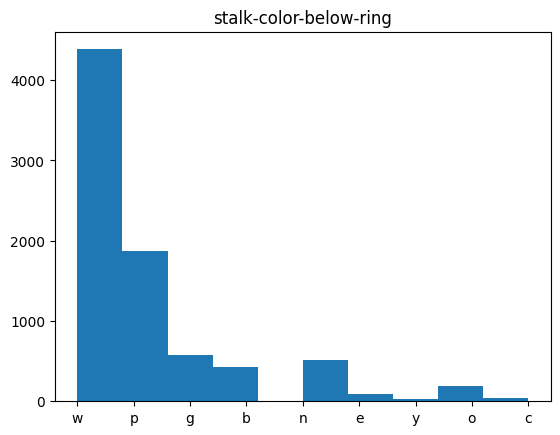

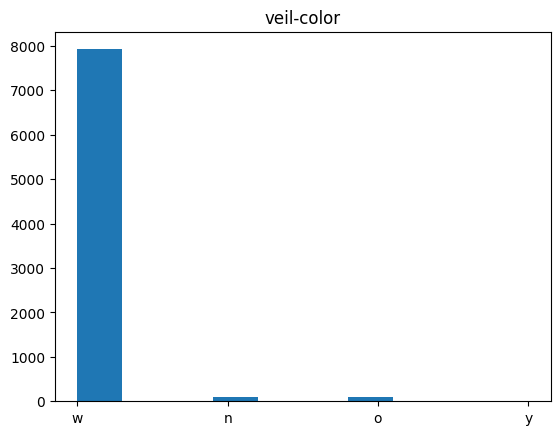

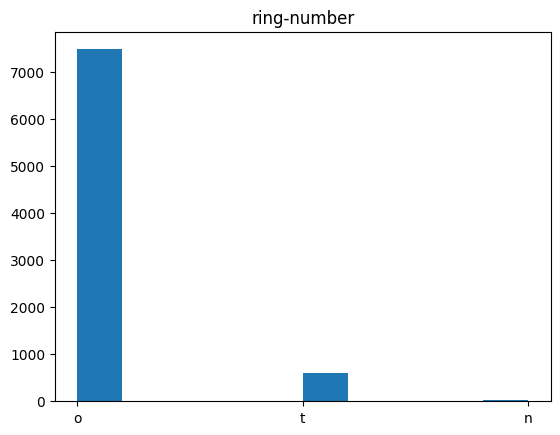

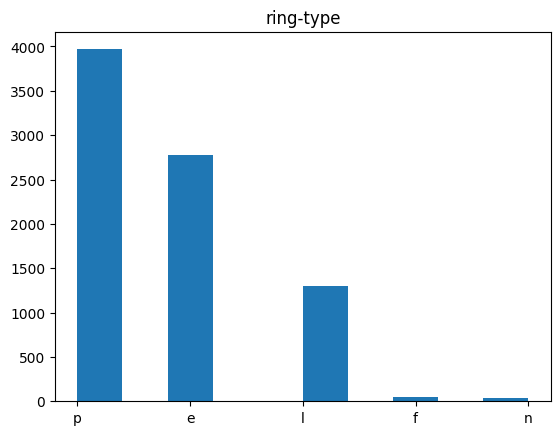

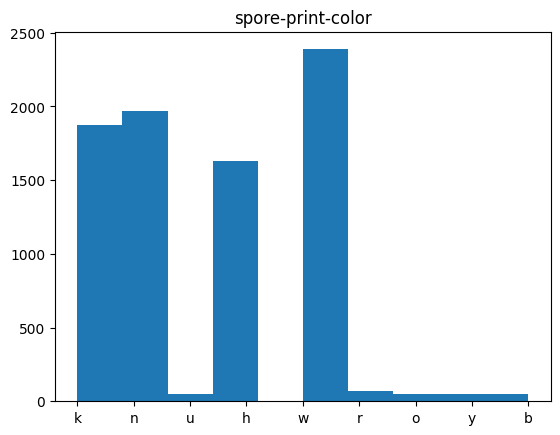

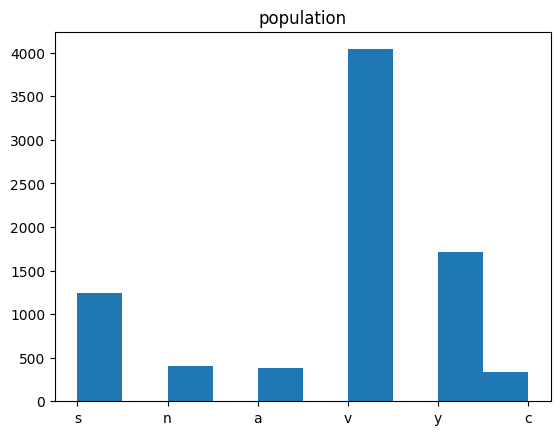

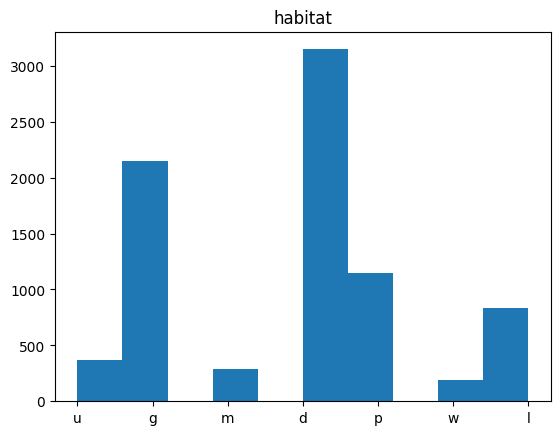

In [16]:
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

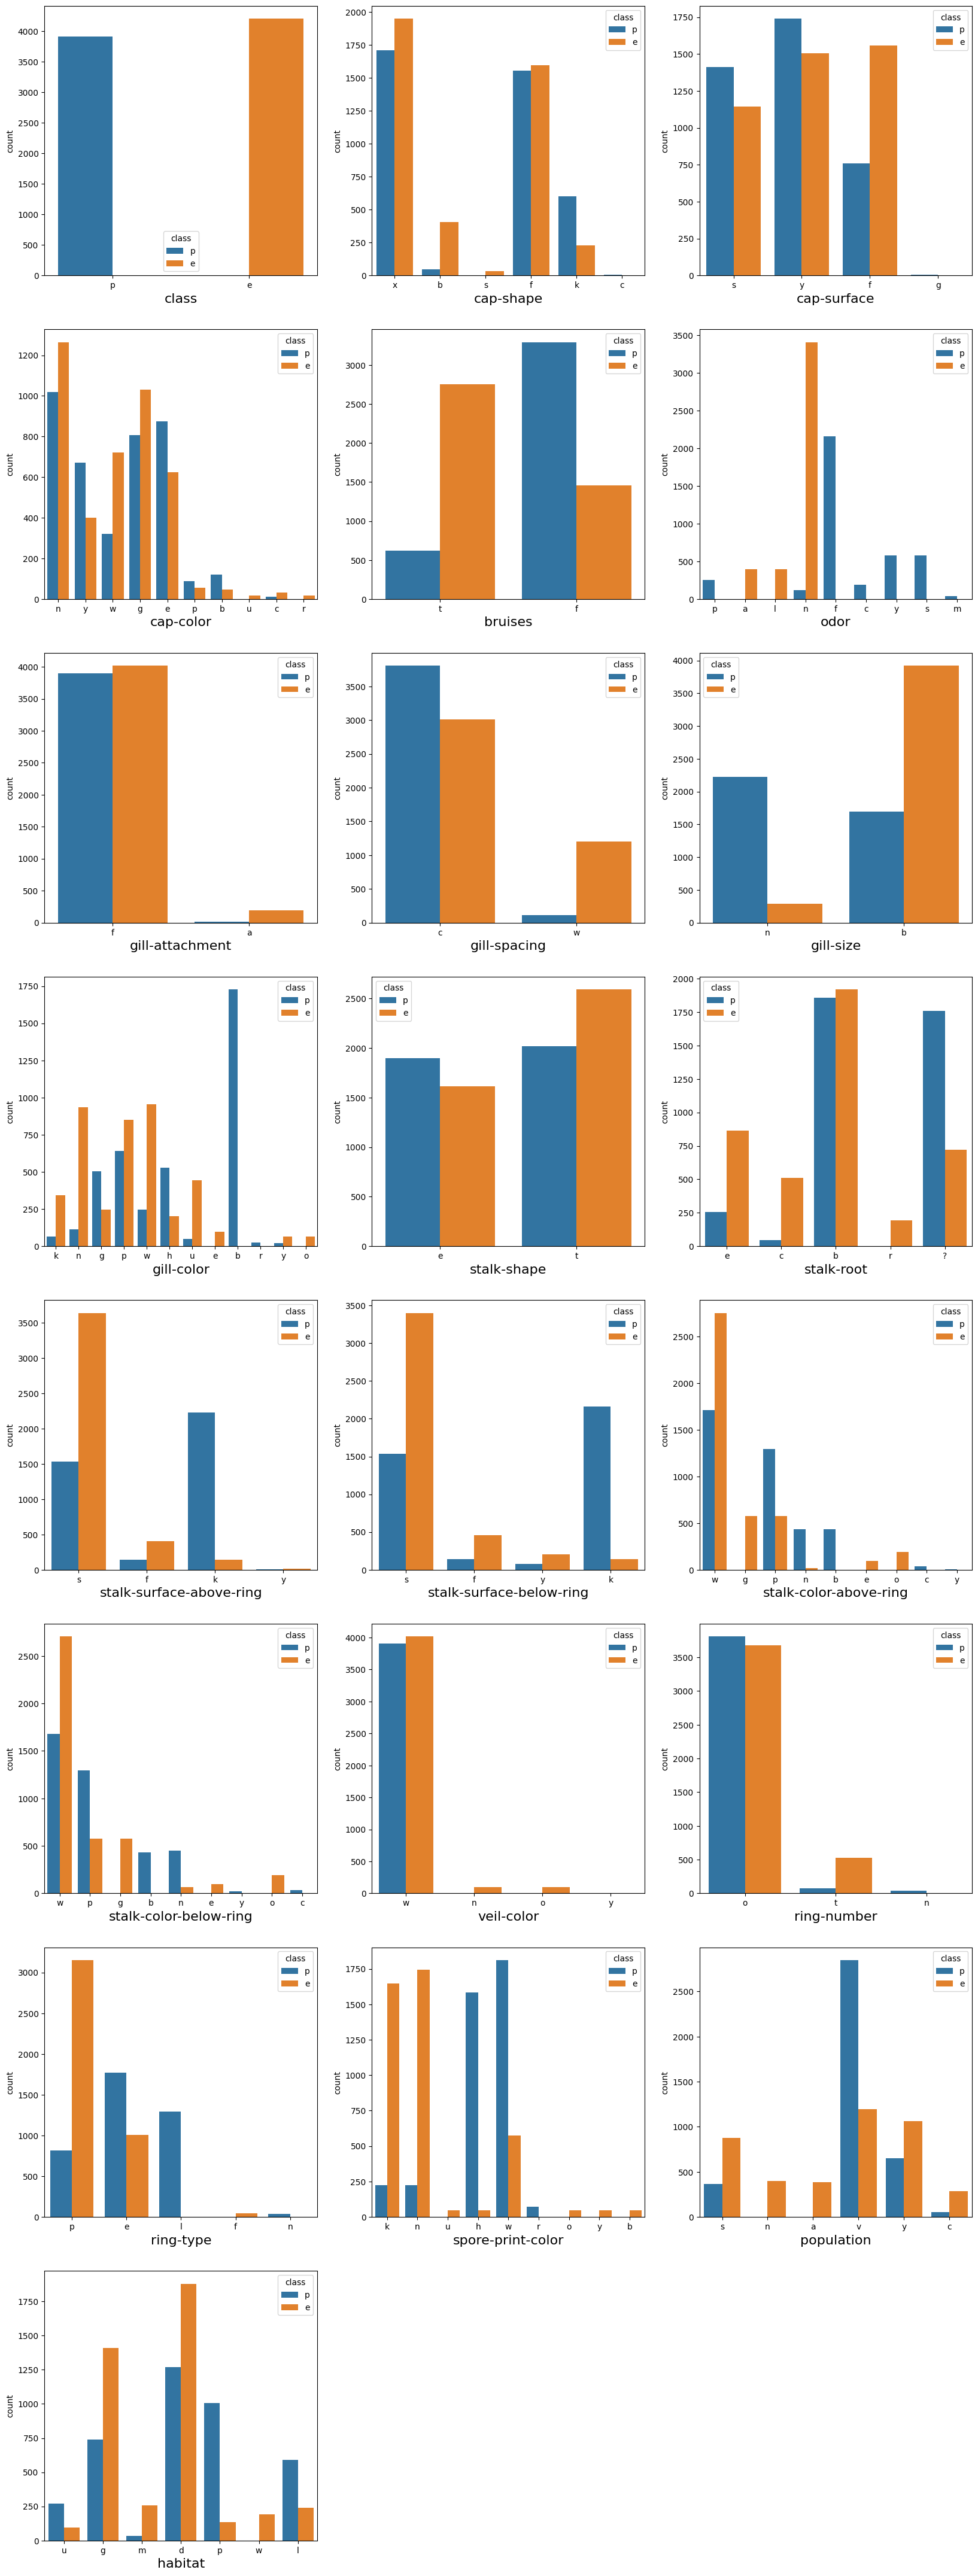

In [17]:
plt.figure(figsize = (20, 55))
plotnumber=1
for col in data.columns:
    plt.subplot(8,3,plotnumber)
    sns.countplot(x=data[col],hue="class",data=data)
    plt.xlabel(col,fontsize=16)
    plotnumber +=1
plt.show()

**Conclusions from EDA**

Many conclusions can be drawn from the bar graphs above. 
* Sunken and conical mushrooms are edible, knobbed caps are more likely to be poisonous and bell caps are more likely to be edible.
* Fibrous cap surfaces are significantly more likely to be edible; grooved caps are edible
* Purple and green colored caps are edible, otherwise it's not particularly indicitive
* Mushrooms with bruises are more likely to be edible and those without bruises are more likely to be poisonous
* Mushroom odor is quite indicative of whether or not a muchroom is poisonous; those with no odor are most likely to be edible (but not necessarily), those with foul, fishy, spciy, pungent, creosote or musty odor are poisonous; anise or almond odor are edible
* Gill attachments are not particularly indicitive 
* Crowded gills are more likely to be edible and close gills are slightly more likely to be poisonous
* Buff and green gill color is poisonous, red and orange are edible. Pink, white, brown, purple, black and yellow are more likely to be edible. Gray, chocolate are more likely to be poisonous.
* stalk shapes are not particularly indicitive
* rooted stalks are edible, and equal or club stalks are more likely to be edible. Bulbous stalks are more likely to be poisonous
* smooth and fibrous stalk surfaces above ring are more likely to be edible, whereas silky is more likely to be poisonous
    * the same trend is followed for stalk surfaces below the ring
* brown and orange veil colors are edible, yellow are poisonous and white is fairly evenly distributed
* Mushrooms with no rings are poisonous, those with two rings are more likely to be edible
* large and no ring types are poisonous, flaring is edible. Evanescent is more likely to be poisonous and pendant is more likely to be edible
* green spore prints are poisonous; oragen, yellow, buff and purple are edible; brown and black are more likely to be edible and white and chocolate are more likely to be poisonous
* Numerous and abundant populations are edible; solitary, scattered and clustered are more likely to be edible; several is more likely to be poisonous
* Mushrooms who live in waste habitats are edible; Those who live in woods, grasses, and meadows are more likely to be edible; those who live on paths or urban areas are more likely to be poisonous



In [18]:
'''   
data['class']  /  data['cap-shape'] / data['cap-surface'] / data['cap-color'] / data['bruises'] / data['odor'] / data['gill-attachment'] / data['gill-spacing']
data['gill-size'] / data['gill-color'] / data['stalk-shape'] / data['stalk-root'] / data['stalk-surface-above-ring'] / data['stalk-surface-below-ring'] / data['stalk-color-above-ring']
data['stalk-color-below-ring'] / data['veil-color'] / data['ring-number'] / data['ring-type'] / data['spore-print-color'] / data['population'] / data['habitat']
'''

"   \ndata['class']  /  data['cap-shape'] / data['cap-surface'] / data['cap-color'] / data['bruises'] / data['odor'] / data['gill-attachment'] / data['gill-spacing']\ndata['gill-size'] / data['gill-color'] / data['stalk-shape'] / data['stalk-root'] / data['stalk-surface-above-ring'] / data['stalk-surface-below-ring'] / data['stalk-color-above-ring']\ndata['stalk-color-below-ring'] / data['veil-color'] / data['ring-number'] / data['ring-type'] / data['spore-print-color'] / data['population'] / data['habitat']\n"

# Prepare for Modeling

In [19]:
#for col in data.columns:
#data[col] = labelencoder.fit_transform(data[col])
#label encode the data to prepare for modeling
#all columns in dataset are categorical so a for loop comes in handy
#label encoding is preferred for categorical variables
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'])
data['cap-shape'] =LE.fit_transform(data['cap-shape'])
data['cap-surface'] =LE.fit_transform(data['cap-surface'])
data['cap-color'] =LE.fit_transform(data['cap-color'])
data['bruises'] = LE.fit_transform(data['bruises'])
data['odor'] = LE.fit_transform(data['odor'])
data['gill-attachment'] = LE.fit_transform(data['gill-attachment'])
data['gill-spacing'] = LE.fit_transform(data['gill-spacing'])
data['gill-size'] = LE.fit_transform(data['gill-size'])
data['gill-color'] = LE.fit_transform(data['gill-color'])
data['stalk-shape'] =LE.fit_transform( data['stalk-shape'])
data['stalk-root'] = LE.fit_transform(data['stalk-root'])
data['stalk-surface-above-ring'] = LE.fit_transform(data['stalk-surface-above-ring'])
data['stalk-surface-below-ring'] = LE.fit_transform(data['stalk-surface-below-ring'] )
data['stalk-color-above-ring'] = LE.fit_transform(data['stalk-color-above-ring'])   
data['stalk-color-below-ring'] = LE.fit_transform(data['stalk-color-below-ring'])
data['veil-color']  = LE.fit_transform(data['veil-color'] )
data['ring-number'] = LE.fit_transform(data['ring-number'])
data['ring-type'] = LE.fit_transform(data['ring-type'])
data['spore-print-color'] = LE.fit_transform(data['spore-print-color'])
data['population'] = LE.fit_transform(data['population'])
data['habitat'] = LE.fit_transform(data['habitat'])

In [19]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [21]:
#split data to x and y
x_data = data.iloc[:,1:]
y_data = data.iloc[:,0]
print('The Shape Of X Dat Is ==> ',x_data.shape)#The Shape Of X Dat Is ==>  (8124, 21)
print('The Shape Of Y Data Is ==> ',y_data.shape)#The Shape Of Y Data Is ==>  (8124,)
# Splitting Data 
x_train,x_test , y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0)

The Shape Of X Dat Is ==>  (8124, 21)
The Shape Of Y Data Is ==>  (8124,)


In [22]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [23]:
#scaling the data
Scalar1 = StandardScaler()
data_new = Scalar1.fit_transform(data)
x_train_scaled = Scalar1.fit_transform(x_train)
x_test_scaled  = Scalar1.fit_transform(x_test)

# Modeling the Data

In [24]:
#Naive Bayes of scaled data
gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
gnb_pred = gnb.predict(x_test_scaled)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       852
           1       0.91      0.92      0.92       773

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625





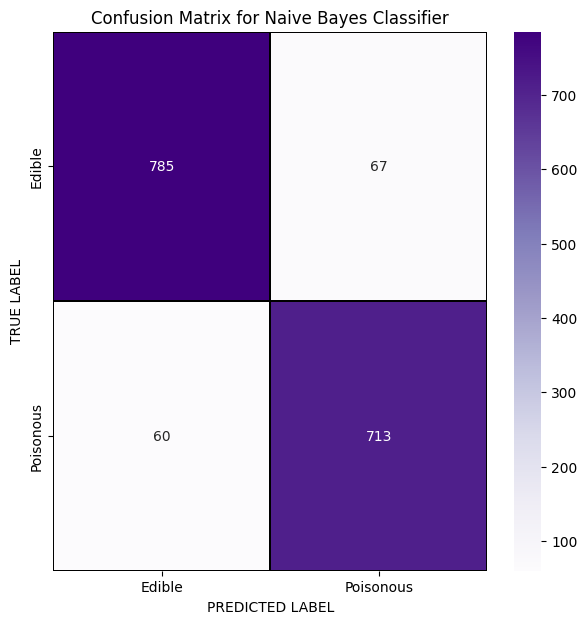

In [25]:
print(classification_report(y_test,gnb_pred))
print('\n')
cm = confusion_matrix(y_test, gnb_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [26]:
#Logistic Regression of scaled data
lr = LogisticRegression(penalty='l1',tol=0.0001,n_jobs=-1,max_iter=50000,solver='saga',C=1.0,random_state=0)
lr.fit(x_train_scaled,y_train)
#Calculating Details
print('LogisticRegressionModel Train Score is ==>  ' , lr.score(x_train_scaled, y_train))
print('LogisticRegressionModel Test Score is  ==> '  , lr.score(x_test_scaled, y_test))
print('LogisticRegressionModel Classes are    ==> '  , lr.classes_)
print('LR_Model No. of iteratios is           ==> '  , lr.n_iter_)
print('----------------------------------------------------')
#Calculating Prediction
y1_pred = lr.predict(x_test_scaled)
#y_pred_prob = LR.predict_proba(x1_test)
print('Real Value for LogisticRegressionModel is   ==> ' , list(y_test[:50]))
print('Predicted Value for LogisticRegressionModel ==> ' , list(y1_pred[:50]))
#================================================================================
print('****'*30)
#Calculate  F1Score 
F1_Score1 = f1_score(y_test,y1_pred,average='micro')
print('The Accuracy Of Algorithm By Using F1_Score Is ==> ',F1_Score1*100)
print('****'*30)

LogisticRegressionModel Train Score is ==>   0.9661486382520388
LogisticRegressionModel Test Score is  ==>  0.9649230769230769
LogisticRegressionModel Classes are    ==>  [0 1]
LR_Model No. of iteratios is           ==>  [309]
----------------------------------------------------
Real Value for LogisticRegressionModel is   ==>  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
Predicted Value for LogisticRegressionModel ==>  [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1]
************************************************************************************************************************
The Accuracy Of Algorithm By Using F1_Score Is ==>  96.49230769230769
************************************************************************************************************************


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       852
           1       0.97      0.95      0.96       773

    accuracy                           0.96      1625
   macro avg       0.97      0.96      0.96      1625
weighted avg       0.97      0.96      0.96      1625





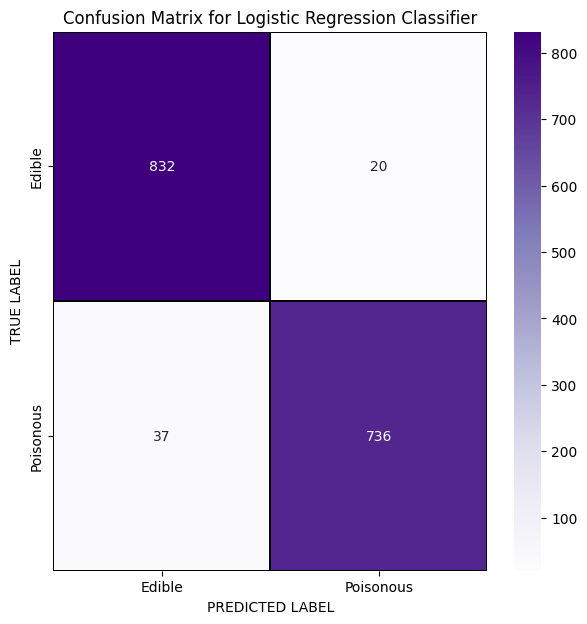

In [27]:
print(classification_report(y_test,y1_pred))
print('\n')
cm = confusion_matrix(y_test, y1_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [ ]:
#Decision Tree of scaled data
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,dtc_pred))
print('\n')

cm = confusion_matrix(y_test, dtc_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
#Random Forest of scaled data
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)

#print(classification_report(y_test,rf_pred))

In [ ]:
print(classification_report(y_test,rf_pred))
print('\n')
cm = confusion_matrix(y_test, rf_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
#K Nearest Neighbors of scaled data
knc = KNeighborsClassifier(2)
knc.fit(X_train_scaled,y_train)
knc_pred = knc.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,knc_pred))
print('\n')

cm = confusion_matrix(y_test, knc_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [ ]:
#XGBoost of scaled data
xgc = XGBClassifier()
xgc.fit(X_train_scaled,y_train)
xgc_pred = xgc.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,xgc_pred))
print('\n')

cm = confusion_matrix(y_test, xgc_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Conclusions

Naive Bayes, Logistic Regression, Decision Tree, Random Forest, K Nearest Neighbors and XGBoost classifiers were used to model mushroom edibility. All classfiers except Naive Bayes and Logistic Regression had perfect precision, recall and accuracy, but don't appear to overfit the data. Many others who have modeled this dataset had similar results. There is not much needed to further improve the model based on the already impressive results. 